In [1]:
# 60-1 Google Newsデータセットの学習済み単語ベクトルをダウンロードしで読み込む

# https://radimrehurek.com/gensim/models/keyedvectors.html
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# google news vector の掲載サイト https://code.google.com/archive/p/word2vec/
# word2vec に関する論文
# Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. 
# Distributed Representations of Words and Phrases and their Compositionality. 
# In Proceedings of NIPS, 2013.

In [2]:
# 60-2 ”United States”の単語ベクトルを表示
# (ただし，”United States”は内部的には”United_States”と表現されている)
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [3]:
# 60-3 ベクトルのサイズと、モデルのサイズを確認
print(model['United_States'].shape)
print(len(model))

(300,)
3000000


In [4]:
# 61. 単語の類似度“United States”と”U.S.”のコサイン類似度を計算
print(model.similarity('United_States', 'U.S.'))

0.73107743


In [5]:
# 62. 類似度の高い単語10件 “United States”とコサイン類似度が高い10語と，その類似度を出力
top10 = model.most_similar('United_States', topn=10)
for word, similarity in top10:
    print(word, similarity)

Unites_States 0.7877248525619507
Untied_States 0.7541370987892151
United_Sates 0.7400724291801453
U.S. 0.7310774326324463
theUnited_States 0.6404393911361694
America 0.6178410053253174
UnitedStates 0.6167312264442444
Europe 0.6132988929748535
countries 0.6044804453849792
Canada 0.601906955242157


In [6]:
# 63-1 加法構成性によるアナロジー 
#“Spain”- ”Madrid”+”Athens”のベクトルを計算し，類似度の高い10語とその類似度を出力
top10 = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
for word, similarity in top10:
    print(word, similarity)

Greece 0.6898480653762817
Aristeidis_Grigoriadis 0.560684859752655
Ioannis_Drymonakos 0.5552908778190613
Greeks 0.545068621635437
Ioannis_Christou 0.5400862097740173
Hrysopiyi_Devetzi 0.5248445272445679
Heraklio 0.5207759737968445
Athens_Greece 0.516880989074707
Lithuania 0.5166865587234497
Iraklion 0.5146791338920593


In [7]:
# 63-2
vector = model['Spain'] - model['Madrid'] + model['Athens']
top10 = model.most_similar(positive=[vector], topn=10)
for word, similarity in top10:
    print(word, similarity)

Athens 0.7528455853462219
Greece 0.6685472130775452
Aristeidis_Grigoriadis 0.5495778322219849
Ioannis_Drymonakos 0.5361457467079163
Greeks 0.5351786017417908
Ioannis_Christou 0.5330225825309753
Hrysopiyi_Devetzi 0.5088489055633545
Iraklion 0.5059264302253723
Greek 0.5040615797042847
Athens_Greece 0.5034108757972717


In [8]:
# 64-1 単語アナロジーの評価データの vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，
# そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記
# 計算した結果を保存

import time
import pickle
import os

# result = []
# count = 0
# category = 'dummy'

# with open('questions-words.txt') as f:
#     start_time = time.time()
#     for line in f.read().splitlines():
#         count = count + 1
#         if count % 100 == 0:
#             print('##', count, time.time() - start_time)
#             start_time = time.time()
#         items = line.split()
#         if len(items) != 4:
#             category = items[1]
#             continue

#         word, similarity = model.most_similar(positive=[items[1], items[2]], negative=[items[0]], topn=1)[0]
#         result.append({'category': category, 
#                        '1': items[0], '2': items[1], '3': items[2], '4': items[3], 
#                        'word': word, 'similarity': similarity})

# with open('nl100_7_64_result.pkl', 'wb') as f:
#     pickle.dump(result, f)

In [9]:
# 64-3 保存した前セルで計算した結果をロード
import pickle

with open('nl100_7_64_result.pkl', 'rb') as f:
    result = pickle.load(f)

In [10]:
# 65. アナロジータスクでの正解率
# 64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の
# 正解率を測定
import re

correct = 0
count = 0
for _result in result:
    if not re.search(r'^gram', _result['category']):
        count = count + 1
        if _result['4'] == _result['word']:
            correct = correct + 1
print('semantic_analogy_result accuracy: ', correct / count, f'({correct}/{count})')
      
correct = 0
count = 0
for _result in result:
    if re.search(r'^gram', _result['category']):
        count = count + 1
        if _result['4'] == _result['word']:
            correct = correct + 1
print('syntactic_analogy_result accuracy: ', correct / count, f'({correct}/{count})')

semantic_analogy_result accuracy:  0.7308602999210734 (6482/8869)
syntactic_analogy_result accuracy:  0.7400468384074942 (7900/10675)


In [11]:
# 66. WordSimilarity-353での評価
# The WordSimilarity-353 Test Collectionの評価データをダウンロードし，
# 単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間の
# スピアマン相関係数を計算
import csv
from scipy.stats import spearmanr

word_pair = []
with open('wordsim353_combined.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if re.search(r'^Word', row[0]):
            continue
        word_pair.append({'word1': row[0], 'word2': row[1], 'human_similarity': float(row[2]),
                         'vec_similarity': model.similarity(row[0], row[1])})

# 順位を降順にソートした場合のスピアマン相関係数を計算
word_pair = sorted(word_pair, key=lambda x: x['human_similarity'], reverse=True)
rank = 1
for pair in word_pair:
    pair['human_rank'] = rank
    rank = rank + 1

word_pair = sorted(word_pair, key=lambda x: x['vec_similarity'], reverse=True)
rank = 1
for pair in word_pair:
    pair['vec_rank'] = rank
    rank = rank + 1

human_rank = []
vec_rank = []
for pair in word_pair:
    human_rank.append(pair['human_rank'])
    vec_rank.append(pair['vec_rank'])

correlation, pvalue = spearmanr(human_rank, vec_rank)
print('順位を降順にソートした場合のスピアマン相関係数', correlation)

# 順位を昇順にソートした場合のスピアマン相関係数を計算
word_pair = sorted(word_pair, key=lambda x: x['human_similarity'])
rank = 1
for pair in word_pair:
    pair['human_rank'] = rank
    rank = rank + 1

word_pair = sorted(word_pair, key=lambda x: x['vec_similarity'])
rank = 1
for pair in word_pair:
    pair['vec_rank'] = rank
    rank = rank + 1

human_rank = []
vec_rank = []
for pair in word_pair:
    human_rank.append(pair['human_rank'])
    vec_rank.append(pair['vec_rank'])

correlation, pvalue = spearmanr(human_rank, vec_rank)
print('順位を昇順にソートした場合のスピアマン相関係数', correlation)

順位を降順にソートした場合のスピアマン相関係数 0.6999777932491479
順位を昇順にソートした場合のスピアマン相関係数 0.698003192970663


In [12]:
# 67-1. k-meansクラスタリング
# 国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行
# 国名リスト https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes 
# UN Statistical data retrieved 8 December 2020, Wikipedia data retrieved 8 December 2020
import csv
import re

country = []
country_vec = []
_not_counted = 0
with open('all_countries.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if re.search(r'^name', row[0]):
            continue
        _country = re.sub(r'\s', '_', row[0])
        if _country not in model:
#             print(f'# "{_country}" is not in model.')
            _not_counted = _not_counted + 1
            continue
        country.append(_country)
        country_vec.append(model[_country])

print(f'{len(country)} countries are inserted into the list, {_not_counted} countries are not inserted.')

197 countries are inserted into the list, 52 countries are not inserted.


In [13]:
# 国名とベクトルのリストをデータフレームに変換してクラスタリングを実行
from sklearn.cluster import KMeans
import pandas as pd

df = pd.DataFrame(country)
kmeans = KMeans(n_clusters=5).fit(country_vec)

In [14]:
# クラスタリングの結果を表示
cluster = [[],[],[],[],[]]
for i in range(len(country)):
    cluster[kmeans.labels_[i]].append(country[i])

for i in range(5):
    print('## cluster', i)
    print(cluster[i])

## cluster 0
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina_Faso', 'Burundi', 'Cameroon', 'Comoros', 'Congo', 'Djibouti', 'Equatorial_Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra_Leone', 'Somalia', 'South_Africa', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Western_Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
## cluster 1
['Cook_Islands', 'Fiji', 'French_Polynesia', 'Guam', 'Kiribati', 'Maldives', 'Marshall_Islands', 'Nauru', 'New_Zealand', 'Niue', 'Northern_Mariana_Islands', 'Palau', 'Pitcairn', 'Samoa', 'Solomon_Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu']
## cluster 2
['Afghanistan', 'Antarctica', 'Australia', 'Bahrain', 'Bangladesh', 'Bhutan', 'Bouvet_Island', 'Brunei_Darussalam', 'Cambodia', 'Canada', 'Chad', 'China', 'Egypt', 'Greenland', 'Holy_See', 'Hong_Kong', 'India', 'Indonesia', '

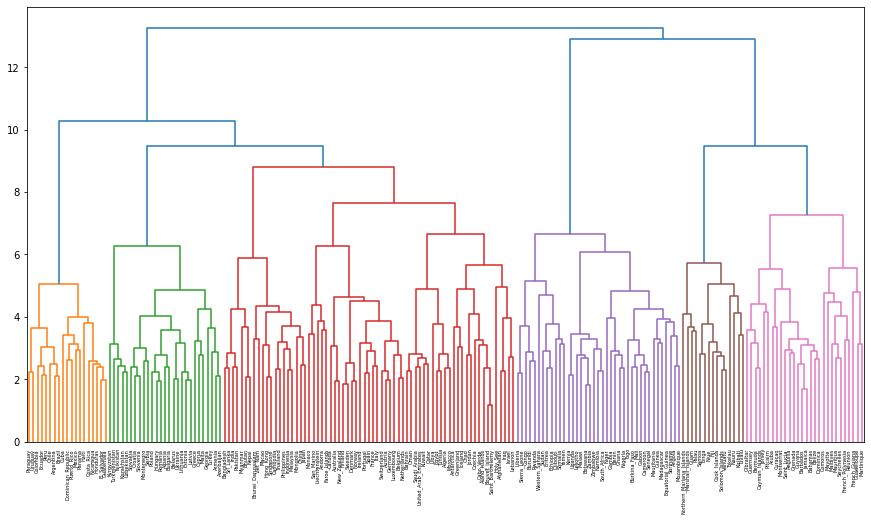

In [15]:
# 68. Ward法によるクラスタリング
# 国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行
# さらに，クラスタリング結果をデンドログラムとして可視化
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(country_vec)
plt.figure(figsize=(15, 8))
dendrogram(linkage_array, labels=country)
plt.show()

e:\work\20220330_seminar_100_4_7\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\work\20220330_seminar_100_4_7\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


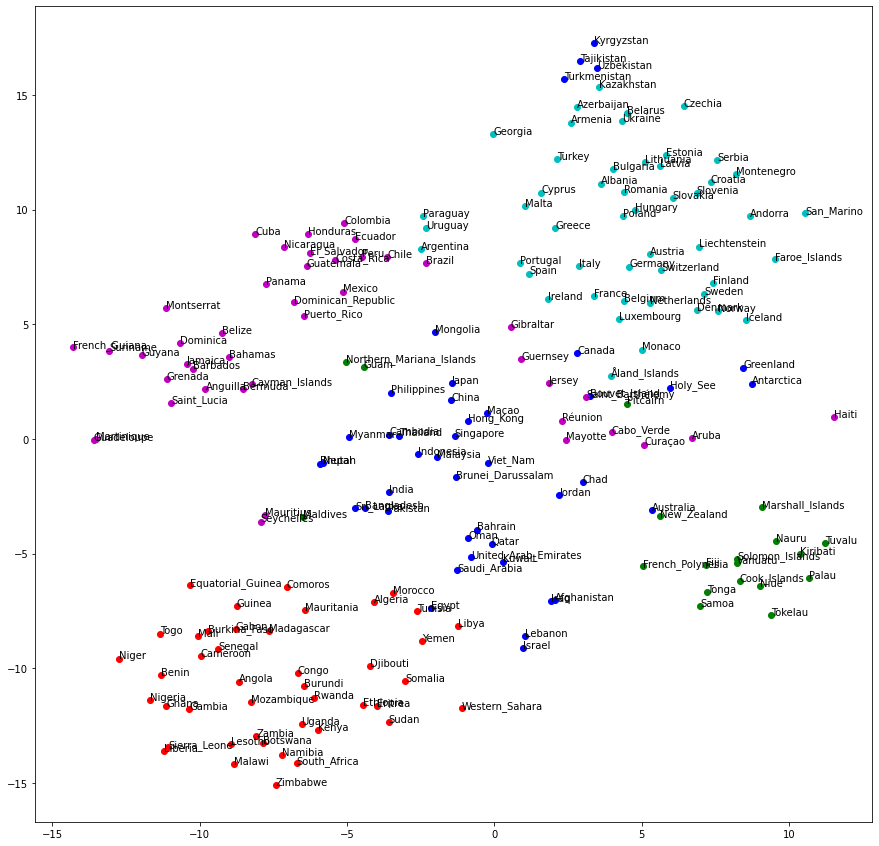

In [16]:
# 69 t-SNEによる可視化
# ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化
# https://qiita.com/g-k/items/120f1cf85ff2ceae4aba
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
country_vec_embedded = tsne.fit_transform(country_vec)

colors =  ["r", "g", "b", "c", "m"]
plt.figure(figsize=(15, 15))
for i in range(len(country)):
    # plt.scatter(country_vec_embedded[i][0],  country_vec_embedded[i][1],
    #             label=country[i], color=colors[kmeans.labels_[i]])
    plt.scatter(country_vec_embedded[i][0],  country_vec_embedded[i][1],
                color=colors[kmeans.labels_[i]])
    plt.annotate(country[i], (country_vec_embedded[i][0],  country_vec_embedded[i][1]))
plt.show()


In [20]:
# おまけ model 中に含まれる単語を10件表示
_count = 0
for word in model.index_to_key:
    print(word)
    _count = _count + 1
    if _count > 10:
        break



</s>
in
for
that
is
on
##
The
with
said
was


In [22]:
# chiVe: Japanese Word Embedding with Sudachi & NWJC https://github.com/WorksApplications/chiVe
from gensim.models import KeyedVectors
model_j = KeyedVectors.load('chive-1.2-mc30_gensim/chive-1.2-mc30.kv')
print(model_j['猫'].shape)
print(len(model_j))


(300,)
912550
